# Wiener Processes

One of the important parameters when evaluating forecast economically is the Oil Price. Several authors have stated that the Oil Price follows a Wiener process in which the future value does not depend on the past but follows Gaussian increments each step. 

`Dcapy.wiener` module provides somes classes to implement simple Random Walks, Brownian Geometric Motion and Mean Reversion. This sections review how to initialize those proccesesss and in laters sections are going to be implemented directly on a cashflow modeling

In [1]:
import os
from dcapy.wiener import Brownian, GeometricBrownian,MeanReversion
from dcapy.dca import ProbVar
import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [2]:
rw = Brownian()
rw

Brownian(initial_condition=0, ti=0, steps=1, processes=1, generator=ProbVar(dist='norm', kw={'loc': 0, 'scale': 1}, factor=1.0, seed=None), freq_input='D', freq_output='D', drift=0)

By default, a `Brownian` class is initialized with random generator defined by a `ProbVar` class (Seen on Montecarlo analysis when forecasting) with a standard normal distribution. 

By calling the method `generate` and pass the number of steps and processes it returns a dataframe with the data.

<AxesSubplot:>

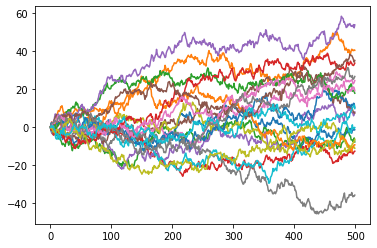

In [3]:
steps = 500 
processes = 20

df = rw.generate(steps, processes)
df.plot(legend=False)

## Add custom parameters

Set initial conditions and drift

<AxesSubplot:>

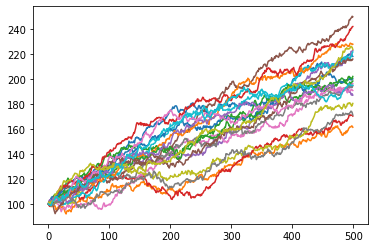

In [4]:
rw = Brownian(
    initial_condition=100,
    ti=0,
    drift = 0.2
)
df = rw.generate(steps, processes)
df.plot(legend=False)



Try different generator parameters

<AxesSubplot:>

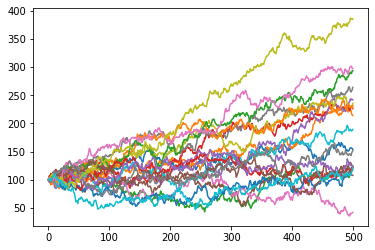

In [5]:
rw = Brownian(
    initial_condition=100,
    ti=0,
    drift = 0.2,
    generator=ProbVar(dist='norm', kw={'loc': 0, 'scale': 3})
)
df = rw.generate(steps, processes)
df.plot(legend=False)

## Add dates

<AxesSubplot:>

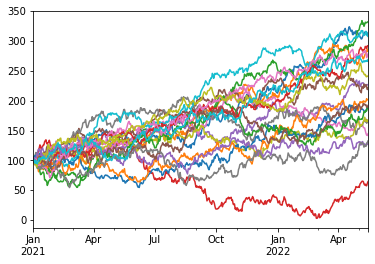

In [6]:
rw = Brownian(
    initial_condition=100,
    ti=date(2021,1,1,),
    freq_output='D',
    drift = 0.2,
    generator=ProbVar(dist='norm', kw={'loc': 0, 'scale': 3})
)
df = rw.generate(steps, processes)
df.plot(legend=False)

<AxesSubplot:>

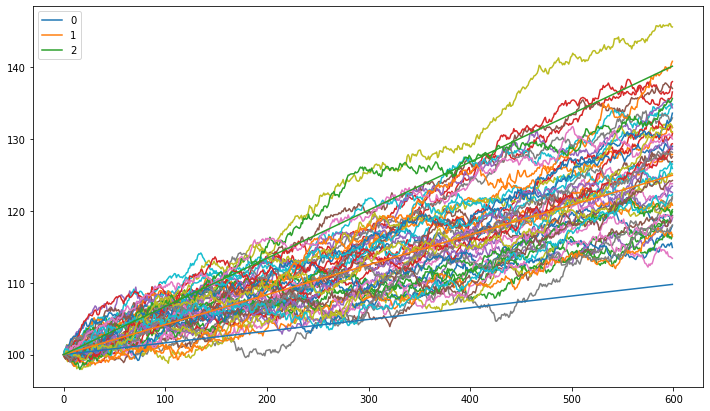

In [7]:
x1 = Brownian(initial_condition=100,drift=0.5, freq_input='A')

fig,ax = plt.subplots(figsize=(12,7))
df1 = x1.generate(50*12,50, freq_output='M')
df1.plot(ax=ax,legend=False)
df1a = x1.generate(50*12,3, freq_output='M',interval=0.07)
df1a.plot(ax=ax)

<AxesSubplot:>

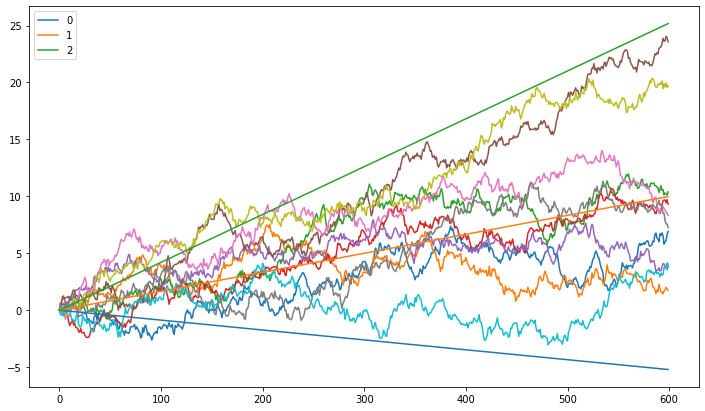

In [8]:
x2 = Brownian(
    initial_condition=0,
    generator = ProbVar(dist='norm',kw={'loc':0,'scale':0.2887}, seed=910821),
    drift=0.2/12,
    freq_input='M')

fig,ax = plt.subplots(figsize=(12,7))
df2 = x2.generate(50*12,10, freq_output='M')
df2.plot(ax=ax,legend=False)
df2a = x2.generate(50*12,3, freq_output='M',interval=0.07)
df2a.plot(ax=ax)

## Geometric Brownian Motion

You can create a Geometric Brownian Motion in the same way

<AxesSubplot:>

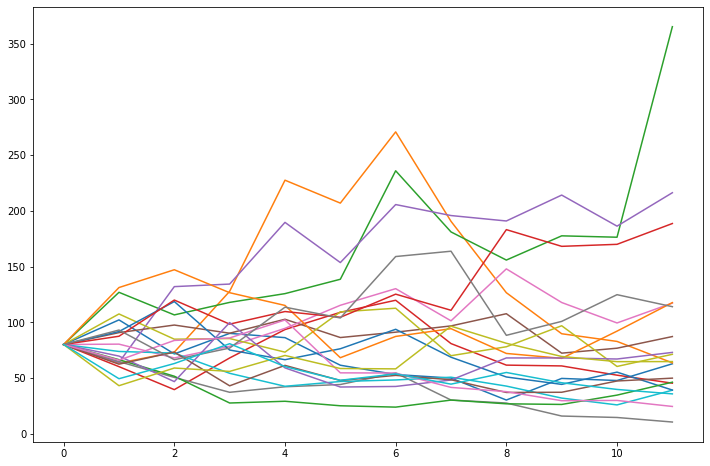

In [9]:
x3 = GeometricBrownian(
    initial_condition=80,
    generator = ProbVar(dist='norm',kw={'loc':0,'scale':0.26}, seed=9113),
    drift=0.01,
    freq_input='A')

fig,ax = plt.subplots(figsize=(12,8))
df3 = x3.generate(12,20, freq_output='A')
df3.plot(ax=ax,legend=False)

<AxesSubplot:>

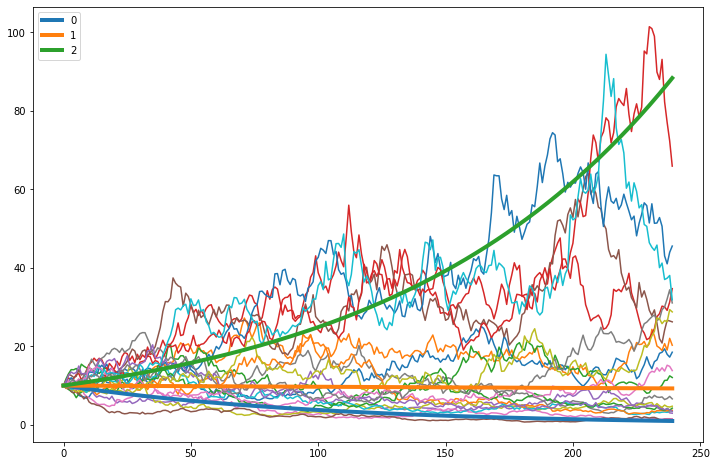

In [10]:
#x4 = Weiner(initial_condition=10,generator=stats.norm, mu=0.03/12, kw_generator={'scale':np.sqrt(np.power(0.26,2)/12)},freq_mu='A', seed=9)

x4 = GeometricBrownian(
    initial_condition=10,
    generator = ProbVar(dist='norm',kw={'loc':0,'scale':np.sqrt(np.power(0.26,2)/12)}, seed=9),
    drift=0.03/12,
    freq_input='A')

fig,ax = plt.subplots(figsize=(12,8))
df4 = x4.generate(20*12,20, freq_output='A')
df4.plot(ax=ax,legend=False)
df4a = x4.generate(20*12,3, freq_output='A',interval=0.1)
df4a.plot(ax=ax, linewidth=4)

<AxesSubplot:>

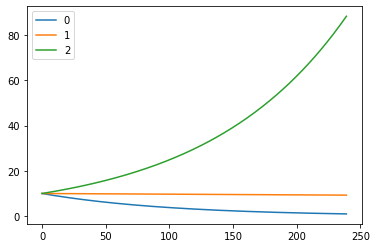

In [11]:

df4 = x4.generate(20*12,3, freq_output='A',interval=0.1)
df4.plot()

## Mean Reversion

To create the mean reversion  instance privide the mean `m` and the velocity of reversion eta `eta`.

<AxesSubplot:>

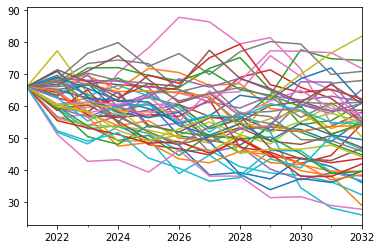

In [13]:
oil_mr = MeanReversion(
    initial_condition = 66,
    ti = date(2021,1,1),
    generator = {'dist':'norm','kw':{'loc':0,'scale':5.13}},
    m=46.77,
    eta=0.112652,
    freq_input = 'A'
)

price_mr = oil_mr.generate(12,50, freq_output='A', seed=21)

price_mr.plot(legend=False)